<a href="https://colab.research.google.com/github/acts701/Audio/blob/main/241028_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# 변수의 shape, type, value 확인
def p(var,_name="") :
    if _name != "" : print(f'<<{_name}>>')
    if type(var)!=type([]):
        try:
            print(f'Shape:{var.shape}')
        except :
            pass
    print(f'Type: {type(var)}')
    print(f'Values: {var}')

def pst(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}, {type(_x)}')
def ps(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}')

In [15]:
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5,3]
plt.rcParams['font.size'] = '8'

keras.__version__

'3.4.1'

In [14]:
level_of_noise = 0.7

In [54]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train/255, x_test/255
x_trainFlattened = x_train.reshape(-1, 28*28)
x_testFlattened = x_test.reshape(-1, 28*28)

noise = level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=(x_trainFlattened.shape))
x_trainNoisyFlattened = x_trainFlattened + noise
x_trainNoisyFlattened = np.clip(x_trainNoisyFlattened, 0, 1)

noise = level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=(x_testFlattened.shape))
x_testNoiseFlattened = x_testFlattened + noise
x_testNoiseFlattened = np.clip(x_testNoiseFlattened, 0, 1)

# plt.imshow(x_trainNoise[0].reshape(28,28))
# pst(x_train) Shape(60000, 28, 28)
# pst(y_train) Shape(60000,)
# pst(x_test) Shape(10000, 28, 28),
# pst(y_test) Shape(10000,)
# pst(noise) Shape(10000, 784)
# pst(x_trainNoise) Shape(60000, 784)
# print(y_train[0])
# plt.imshow(x_train[0].reshape(28,28))
# pst(x_train2D) ape(60000, 784)

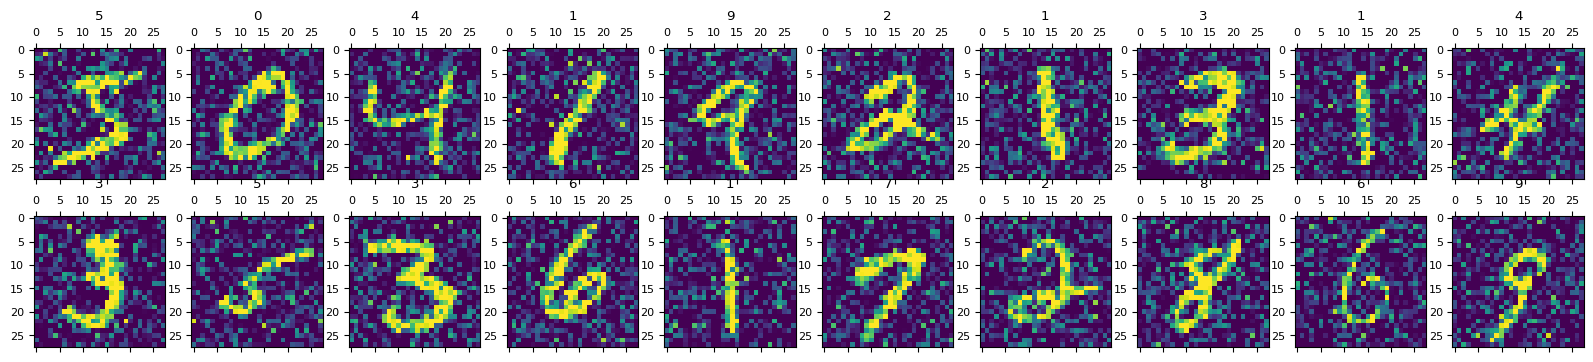

In [16]:
# fig, axs = plt.subplots(2, 10, sharey=False, tight_layout=True, figsize=(20,4), facecolor='white')
fig, axs = plt.subplots(2, 10, figsize=(20,4))

n = 0
for i in range(0,2):
    for j in range(0,10):
        axs[i,j].matshow(x_trainNoise[n].reshape(28,28))
        axs[i,j].set(title = y_train[n])
        n=n+1
plt.show()

In [17]:
def f_ModelAcc():
    modelAcc = keras.models.Sequential([
        keras.Input(shape=[28,28,1]),
        layers.Conv2D(128, 3, padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPool2D(2,2),
        layers.Conv2D(256,3,padding='same'),
        layers.Activation('relu'),
        layers.MaxPool2D(2,2),
        layers.Conv2D(128,3,padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Flatten(name='flatten'),
        layers.Dense(10, activation='softmax')
    ])
    modelAcc.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy', metrics=['acc'])
    return modelAcc

In [18]:
modelAcc = f_ModelAcc()
history = modelAcc.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - acc: 0.9213 - loss: 0.2547 - val_acc: 0.9031 - val_loss: 0.3880
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - acc: 0.9889 - loss: 0.0363 - val_acc: 0.9891 - val_loss: 0.0332
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - acc: 0.9925 - loss: 0.0233 - val_acc: 0.9886 - val_loss: 0.0348
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.9951 - loss: 0.0153 - val_acc: 0.9882 - val_loss: 0.0423
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.9961 - loss: 0.0122 - val_acc: 0.9834 - val_loss: 0.0635


In [56]:
x_trainNoise2D = x_trainFlattened.reshape(-1,28,28,1)
x_testNoise2D = x_testFlattened.reshape(-1,28,28,1)

modelNoise = f_ModelAcc()
# history = modelNoise.fit(x_trainNoise_Reshaped, y_train, batch_size=128, epochs=5, validation_data=(x_testNoise_Reshaped, y_test))
historyNoise = modelNoise.fit(x_trainNoise2D, y_train, batch_size=128, epochs=5, validation_data=(x_testNoise2D, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - acc: 0.9265 - loss: 0.2430 - val_acc: 0.9687 - val_loss: 0.2116
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - acc: 0.9882 - loss: 0.0384 - val_acc: 0.9883 - val_loss: 0.0345
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.9940 - loss: 0.0198 - val_acc: 0.9802 - val_loss: 0.0662
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.9940 - loss: 0.0177 - val_acc: 0.9902 - val_loss: 0.0333
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.9965 - loss: 0.0112 - val_acc: 0.9842 - val_loss: 0.0556


In [46]:
accNormal = modelAcc.evaluate(x_test, y_test)
print(accNormal)
accNoise = modelNoise.evaluate(x_testNoise_Reshaped, y_test)
print(accNoise)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9795 - loss: 0.0763
[0.06345253437757492, 0.9833999872207642]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9740 - loss: 0.0845
[0.06654959172010422, 0.9801999926567078]
